In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
''
ADV_DIR = '../logdir/adversaries'
ADV_SET = 'carlini_attacks_targeted1000.npy'


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
ims = np.load(os.path.join(ADV_DIR, ADV_SET))
print(ims.shape)

(900, 28, 28, 1)


900


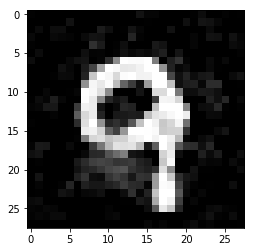

In [3]:
print(ims.shape[0])
fig, ax = plt.subplots()
for i in range(ims.shape[0]):
    plt.imshow(ims[i,:,:,0], interpolation="nearest", cmap="gray")
plt.show()

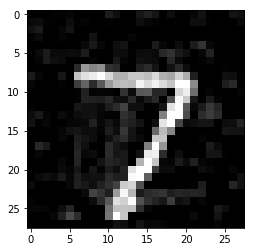

In [4]:
plt.imshow(ims[0,:,:,0], interpolation="nearest", cmap="gray")

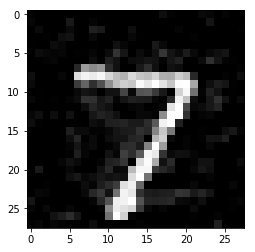

In [5]:
plt.imshow(ims[7,:,:,0], interpolation="nearest", cmap="gray")

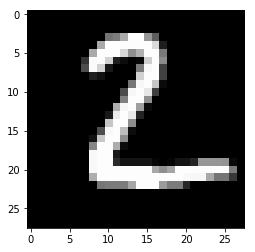

In [6]:
plt.imshow(np.reshape(mnist.test.images[1], [28,28]), interpolation="nearest", cmap="gray")

In [7]:
print("Total distortion:", np.sum((ims[7,:,:,0]-np.reshape(mnist.test.images[1], [28,28]))**2)**.5)

('Total distortion:', 10.763930410216176)


In [8]:
def distortion(adv, t): 
    d = np.sum((adv-np.reshape(t, [28,28]))**2)**.5
    return d

def average_distortion(advs, trues):
    ret = []
    for i in range(advs.shape[0]):
        ret.append(distortion(advs[i,:,:,0], trues[i//9]))
    ret = np.array(ret)
    return np.mean(ret)

def save_as_csv(advs, labels, directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
    for i in range(advs.shape[0]):
        poss = range(10)
        idx = i//9
        t = np.argmax(labels[i//9])
        poss.remove(t)
        adv_guess = poss[i%9]
        fname = str(t) + '_' + str(adv_guess) + '_' + str(idx) + '.csv'
        np.savetxt(os.path.join(directory, fname), np.reshape(advs[i,:,:,0], [784]), delimiter=',')

In [9]:
average_distortion(ims, mnist.test.images)

1.8338436751044014

In [10]:
save_as_csv(ims, mnist.test.labels, os.path.join(ADV_DIR, ADV_SET[:ADV_SET.find('npy')-1]))

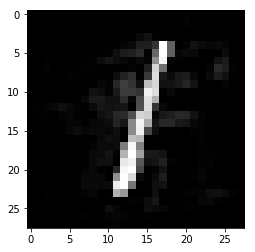

In [11]:
im = np.genfromtxt('../logdir/adversaries/carlini_attacks_targeted500.99/1_8_2.csv', delimiter=',')
plt.imshow(np.reshape(im, [28,28]), interpolation="nearest", cmap="gray")